<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%93%D0%B5%D0%B9%D0%BC%D1%81-%D0%A5%D0%B0%D1%83%D1%8D%D0%BB%D0%BB%20%D0%B4%D0%BB%D1%8F%20%D0%B4%D0%BB%D0%B8%D0%BD%D1%8B%20%D1%82%D0%BE%D0%BA%D0%B5%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from scipy.stats import f_oneway
import os
import glob
import numpy as np
from scipy.stats import f_oneway
from scipy import stats

cefr_levels = ["A1", "A2", "B1", "B2"]
# Здесь следует добавить обработку файлов и расчет средних значений токенов
# И после этого, вы можете использовать код ANOVA, подобный предыдущему примеру.

# Список для хранения длин токенов всех файлов
all_token_lengths = []

# Словарь для хранения средних значений длин токенов в каждом уровне CEFR
avg_lengths_in_level = {}

# Обработка каждого уровня CEFR
for cefr_level in cefr_levels:
    folder_path = f"/content/Students_texts/{cefr_level}"
    file_list = glob.glob(os.path.join(folder_path, "*.txt"))

    # Список для хранения средних значений длин токенов в текущем уровне CEFR
    lengths_in_level = []

    # Обработка каждого файла в текущем уровне CEFR
    for file_path in file_list:
        with open(file_path, 'r') as file:
            text = file.read()
            tokens = text.split()
            token_lengths = [len(token) for token in tokens]
            avg_token_length = np.mean(token_lengths)
            lengths_in_level.append(avg_token_length)
            all_token_lengths.extend(token_lengths)

    # Среднее значение для текущего уровня CEFR
    avg_lengths_in_level[cefr_level] = lengths_in_level

# Вычисление статистик для длин токенов в целом
mean = np.mean(all_token_lengths)
sd = np.std(all_token_lengths)
std_error = stats.sem(all_token_lengths)
ci = stats.t.interval(0.95, len(all_token_lengths)-1, loc=mean, scale=std_error)

# Вывод статистик
print("Статистики для длины токенов в целом:")
print(f"Mean: {mean}")
print(f"SD: {sd}")
print(f"Std. Error: {std_error}")
print(f"95% CI (confidence interval) (mean): {ci}\n")

# ANOVA
f_statistic, p_value = f_oneway(
    avg_lengths_in_level['A1'],
    avg_lengths_in_level['A2'],
    avg_lengths_in_level['B1'],
    avg_lengths_in_level['B2']
)

print(f"F-статистика: {f_statistic}")
print(f"p-value: {p_value}")

Статистики для длины токенов в целом:
Mean: 5.300114714890209
SD: 3.587668657038038
Std. Error: 0.00834555969466446
95% CI (confidence interval) (mean): (5.283757611328384, 5.316471818452034)

F-статистика: 57.30753093011176
p-value: 2.0828233774138275e-34


In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=573b1823659061257affff1477e9a9aff6c1a16b123b0ada3f745fb2205dea0b
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import os
import glob
import numpy as np
import pingouin as pg
import pandas as pd

cefr_levels = ["A1", "A2", "B1", "B2"]

# Создаем DataFrame для хранения данных
data = pd.DataFrame()

# Обработка каждого уровня CEFR
for cefr_level in cefr_levels:
    folder_path = f"/content/Students_texts/{cefr_level}"
    file_list = glob.glob(os.path.join(folder_path, "*.txt"))

    # Список для хранения средних значений длин токенов в текущем уровне CEFR
    lengths_in_level = []

    # Обработка каждого файла в текущем уровне CEFR
    for file_path in file_list:
        with open(file_path, 'r') as file:
            text = file.read()
            tokens = text.split()
            token_lengths = [len(token) for token in tokens]
            avg_token_length = np.mean(token_lengths)
            lengths_in_level.append(avg_token_length)

    # Создаем временный DataFrame для текущего уровня CEFR
    temp_df = pd.DataFrame({cefr_level: lengths_in_level})

    # Объединяем временный DataFrame с общим DataFrame
    data = pd.concat([data, temp_df], axis=1)

# Преобразуем данные в нужный формат
long_data = pd.melt(data, var_name='CEFR Level', value_name='Average Token Length')

# Выполняем тест Геймса-Хауэлла
result = pg.pairwise_gameshowell(data=long_data, dv='Average Token Length', between='CEFR Level')

# Вывод результатов
print(result)

    A   B   mean(A)   mean(B)      diff        se          T          df  \
0  A1  A2  5.113702  4.944422  0.169280  0.178100   0.950479   63.591031   
1  A1  B1  5.113702  5.362862 -0.249160  0.180203  -1.382665   66.637635   
2  A1  B2  5.113702  5.801422 -0.687720  0.193311  -3.557583   86.671880   
3  A2  B1  4.944422  5.362862 -0.418440  0.039406 -10.618640  751.901696   
4  A2  B2  4.944422  5.801422 -0.857001  0.080305 -10.671765  143.019977   
5  B1  B2  5.362862  5.801422 -0.438560  0.084867  -5.167603  176.886636   

           pval    hedges  
0  7.777363e-01  0.267765  
1  5.145413e-01 -0.295615  
2  3.357018e-03 -0.634447  
3  5.939693e-14 -0.692781  
4  2.875478e-14 -1.542602  
5  3.779108e-06 -0.570682  


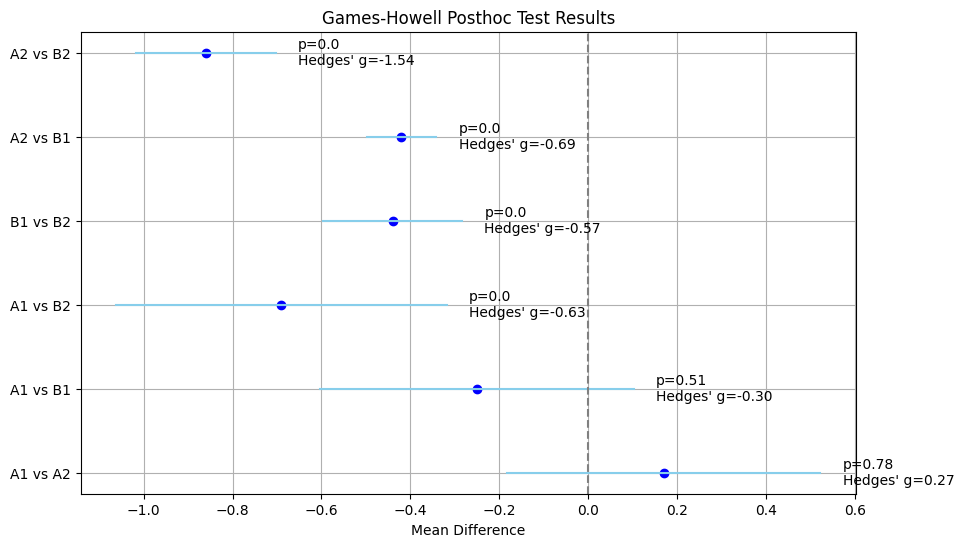

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
groups = ["A1 vs A2", "A1 vs B1", "A1 vs B2", "B1 vs B2", "A2 vs B1", "A2 vs B2"]
mean_diff = [0.17, -0.25, -0.69, -0.44, -0.42, -0.86]
se = [0.18, 0.18, 0.19, 0.08, 0.04, 0.08]
p_values = [0.78, 0.51, 0.00, 0.00, 0.00, 0.00]
hedges_g = [0.27, -0.30, -0.63, -0.57, -0.69, -1.54]

# Calculating the confidence intervals for the mean differences
# Assuming a 95% confidence interval, z-score is approximately 1.96 for a two-tailed test
z_score = 1.96
conf_intervals = [(md - z_score * s, md + z_score * s) for md, s in zip(mean_diff, se)]

# Plotting
plt.figure(figsize=(10, 6))
for i, (group, ci, p, h) in enumerate(zip(groups, conf_intervals, p_values, hedges_g)):
    plt.plot(ci, [i, i], color="skyblue")
    plt.scatter(mean_diff[i], i, color="blue")
    plt.text(ci[1] + 0.05, i, f"p={p}\nHedges' g={h:.2f}", va='center')

# Aesthetic elements
plt.yticks(range(len(groups)), groups)
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel("Mean Difference")
plt.title("Games-Howell Posthoc Test Results")
plt.grid(True)
plt.show()